In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import sys
import os

In [3]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Exposure time

In [ ]:
exposure_time_data = pickle.load(open('../../results/camera_settings_optimization/exposure_times.pkl', 'rb'))

In [ ]:
exposure_times = np.asarray(list(exposure_time_data.keys()))
image_times = [v for v in exposure_time_data.values()]

In [ ]:
average_image_times = [np.mean(v) for v in image_times]
min_image_times = [np.min(v) for v in image_times]
max_image_times = [np.max(v) for v in image_times]

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(exposure_times/1e6, max_image_times, color="#225522", label = "Maximum time")
ax.plot(exposure_times/1e6, average_image_times, color="#555555", label = "Average time")
ax.plot(exposure_times/1e6, min_image_times, color="#663333", label = "Minimum time")

ax.legend(frameon=True)
ax.set_xlabel("Exposure time [s]")
ax.set_ylabel("Image time [s]")

In [ ]:
num_epochs = 20
num_images = 1000
experiment_time = num_epochs * num_images * np.asarray(average_image_times)
experiment_time_hr = experiment_time / (60 * 60)

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(exposure_times/1e6, experiment_time_hr, color="#225522", label = "Experiment time")


ax.legend(frameon=True)
ax.set_xlabel("Exposure time [s]")
ax.set_ylabel("Experiment time [hr]")

In [ ]:
exposure_times[np.where(experiment_time_hr < 6)[0][-1]]/1e6

## Bench SNR

In [13]:
path_data = '../../results/bench_snr/'
path_results = os.path.join(path_data, 'processed')
os.makedirs(path_results, exist_ok=True)
files = os.listdir(path_data)
files = [os.path.join(path_data, f) for f in files if '.pkl' in f]
files = [f for f in files if 'resampled' not in f]
files.sort()

In [14]:
os.listdir(path_data)

['snr_data_0000126337.pkl',
 'snr_data_0000121287.pkl',
 'snr_data_0000328317.pkl',
 'snr_data_0000217228.pkl',
 'snr_data_0000479802.pkl',
 'snr_data_0000494950.pkl',
 'snr_data_0000060693.pkl',
 'snr_data_0000489901.pkl',
 'snr_data_0000050594.pkl',
 'snr_data_0000257624.pkl',
 'snr_data_0000474752.pkl',
 'snr_data_0000070792.pkl',
 'snr_data_0000025347.pkl',
 'snr_data_0000303069.pkl',
 'snr_data_0000232376.pkl',
 'snr_data_0000010198.pkl',
 'snr_data_0000429307.pkl',
 'snr_data_0000393960.pkl',
 'snr_data_0000373762.pkl',
 'snr_data_0000020297.pkl',
 'snr_data_0000368713.pkl',
 'snr_data_0000161683.pkl',
 'snr_data_0000171782.pkl',
 'snr_data_0000176832.pkl',
 'snr_data_0000353564.pkl',
 'snr_data_0000399010.pkl',
 'snr_data_0000237426.pkl',
 'snr_data_0000096040.pkl',
 'snr_data_0000000100.pkl',
 'snr_data_0000409109.pkl',
 'snr_data_0000449505.pkl',
 'snr_data_0000333366.pkl',
 'snr_data_0000065743.pkl',
 'snr_data_0000282871.pkl',
 'snr_data_0000378812.pkl',
 'snr_data_000014148

In [15]:
exposure_times = [int(f.split("_")[-1].replace('.pkl', '')) for f in files]

In [16]:
indices = [ i for i in range(0, len(files), 10)]
print(indices)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


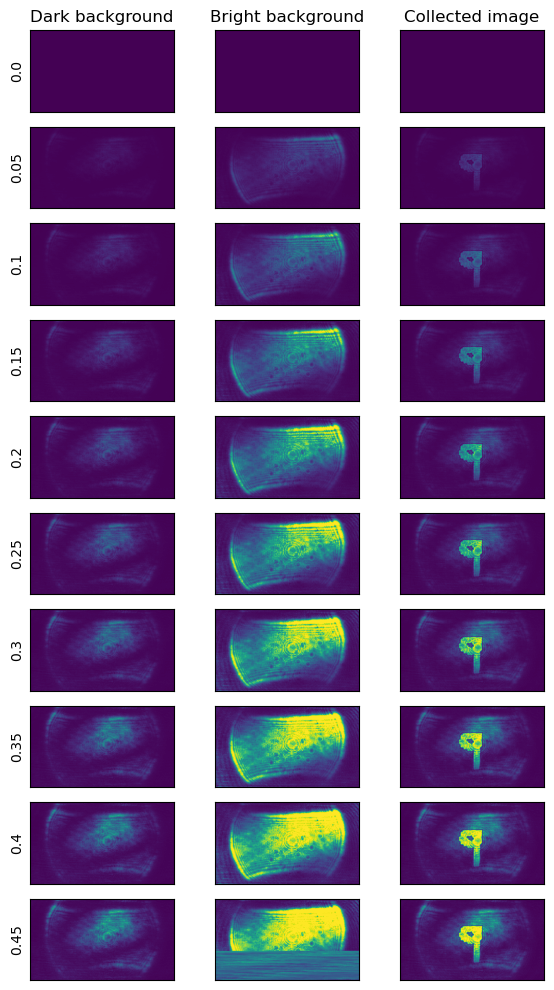

In [17]:
fig,ax = plt.subplots(10,3, figsize=(6,10))

for i,idx in enumerate(indices):
    data = pickle.load(open(files[idx], 'rb'))
    exposure_time = np.round(exposure_times[idx]/1e6, 2)

    ax[i][0].imshow(data['dark_background'], vmin=0, vmax=1)
    ax[i][0].set_ylabel(f"{exposure_time}")
    ax[i][1].imshow(data['bright_background'], vmin=0, vmax=1)
    ax[i][2].imshow(data['collected_images'][1], vmin=0, vmax=1)

for a in ax.flatten():
    a.set_xticks([], [])
    a.set_yticks([], [])

ax[0][0].set_title("Dark background")
ax[0][1].set_title("Bright background")
ax[0][2].set_title("Collected image")

plt.tight_layout()
fig.savefig(os.path.join(path_results, 'example_images.pdf'))

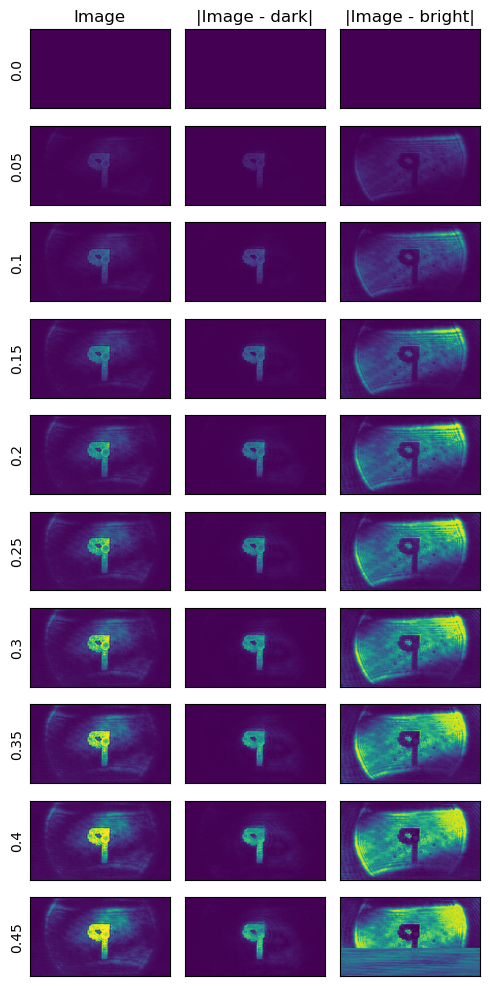

In [18]:
fig,ax = plt.subplots(10,3, figsize=(5,10))

max_vals_dark = []
min_vals_dark = []

max_vals_bright = []
min_vals_bright = []

for i,idx in enumerate(indices):
    data = pickle.load(open(files[idx], 'rb'))
    exposure_time = np.round(exposure_times[idx]/1e6, 2)

    dark_background = data['dark_background']
    bright_background = data['bright_background']
    collected_image = data['collected_images'][1]

    image_minus_dark = collected_image - dark_background
    image_minus_bright = collected_image - bright_background

    max_vals_dark.append(np.max(image_minus_dark))
    min_vals_dark.append(np.min(image_minus_dark))
    max_vals_bright.append(np.max(image_minus_bright))
    min_vals_bright.append(np.min(image_minus_bright))
    
    ax[i][0].imshow(collected_image, vmin=0, vmax=1)
    ax[i][0].set_ylabel(f"{exposure_time}")
    ax[i][1].imshow(np.abs(image_minus_dark), vmin=0, vmax=1)
    ax[i][2].imshow(np.abs(image_minus_bright), vmin=0, vmax=1)

for a in ax.flatten():
    a.set_xticks([], [])
    a.set_yticks([], [])

ax[0][0].set_title("Image")
ax[0][1].set_title("|Image - dark|")
ax[0][2].set_title("|Image - bright|")

plt.tight_layout()
fig.savefig(os.path.join(path_results, 'subtracted_images.pdf'))

## SNR calculations

In [19]:
ideal_images = pickle.load(open(os.path.join(path_data, 'resampled_images.pkl'), 'rb'))
ideal_images = [image.squeeze().numpy()/255 for image in ideal_images]

/home/mblgh6/miniconda3/envs/dom/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [20]:
# Calculate masks based on the ideal images
masks_signal = [(image > 0.5).astype(np.int32) for image in ideal_images]
masks_noise = [np.abs(image -1 ).astype(np.int32) > 0.5 for image in ideal_images]

Text(0.5, 1.0, 'Noise mask')

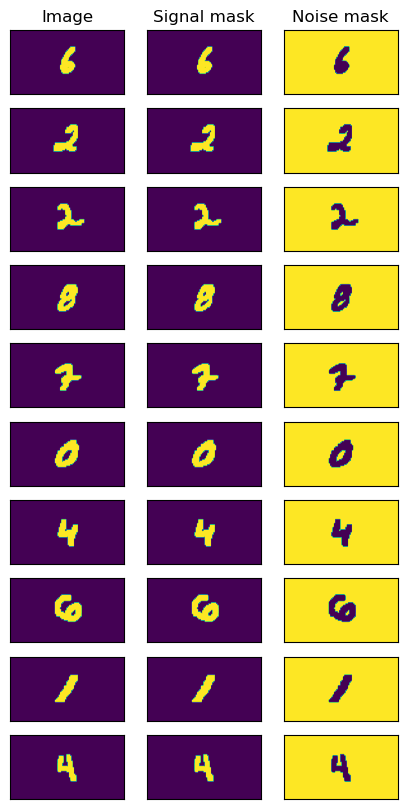

In [21]:
# Plot the masks
fig,ax = plt.subplots(10,3, figsize=(5,10))

for i,(image, mask_signal, mask_noise) in enumerate(zip(ideal_images, masks_signal, masks_noise)):
    ax[i][0].imshow(image, vmin=0, vmax=1)
    ax[i][1].imshow(mask_signal, vmin=0, vmax=1)
    ax[i][2].imshow(mask_noise, vmin=0, vmax=1)


for a in ax.flatten():
    a.set_xticks([], [])
    a.set_yticks([], [])

ax[0][0].set_title("Image")
ax[0][1].set_title("Signal mask")
ax[0][2].set_title("Noise mask")

In [22]:
# For each exposure time
#   Get the dark background
#   For each collected image at that exposure
#     Subtract the dark background from the collected image
#     Mask the collected image with the signal mask and sum
#     Mask the collected image with the noise mask and sum
#     Mask the background subtracted image with the signal mask and sum
#     Mask the background subtracted image with the noise mask and sum
#   Average each of the summations
#   Get the SNR at that exposure

In [23]:
snr_average = []
snr_max = []
snr_min = []
bgs_snr_average = []
bgs_snr_max = []
bgs_snr_min = []
for i, (f, et) in enumerate(zip(files, exposure_times)):
    data = pickle.load(open(f, 'rb'))
    dark_background = data['dark_background']
    signal_sum = []
    noise_sum = []
    bgs_signal_sum = []
    bgs_noise_sum = []
    for j,image in enumerate(data['collected_images']):
        background_subtracted = np.abs(image - dark_background)
        original_signal = masks_signal[j] * image
        original_noise = masks_noise[j] * image
        bgs_signal = masks_signal[j] * background_subtracted
        bgs_noise = masks_noise[j] * background_subtracted
        signal_sum.append(np.sum(original_signal))
        noise_sum.append(np.sum(original_noise))
        bgs_signal_sum.append(np.sum(bgs_signal))
        bgs_noise_sum.append(np.sum(bgs_noise))
    average_signal = np.mean(signal_sum)
    max_signal = np.max(signal_sum)
    min_signal = np.min(signal_sum)
    average_noise = np.mean(noise_sum)
    max_noise = np.max(noise_sum)
    min_noise = np.min(noise_sum)
    average_bgs_signal = np.mean(bgs_signal_sum)
    max_bgs_signal = np.max(bgs_signal_sum)
    min_bgs_signal = np.min(bgs_signal_sum)
    average_bgs_noise = np.mean(bgs_noise_sum)
    max_bgs_noise = np.max(bgs_noise_sum)
    min_bgs_noise = np.min(bgs_noise_sum)
    
    snr_average.append(average_signal / average_noise)
    snr_min.append(min_signal / max_noise)
    snr_max.append(max_signal / min_noise)
    bgs_snr_average.append(average_bgs_signal / average_bgs_noise)
    bgs_snr_min.append(min_bgs_signal / max_bgs_noise)
    bgs_snr_max.append(max_bgs_signal / min_bgs_noise)

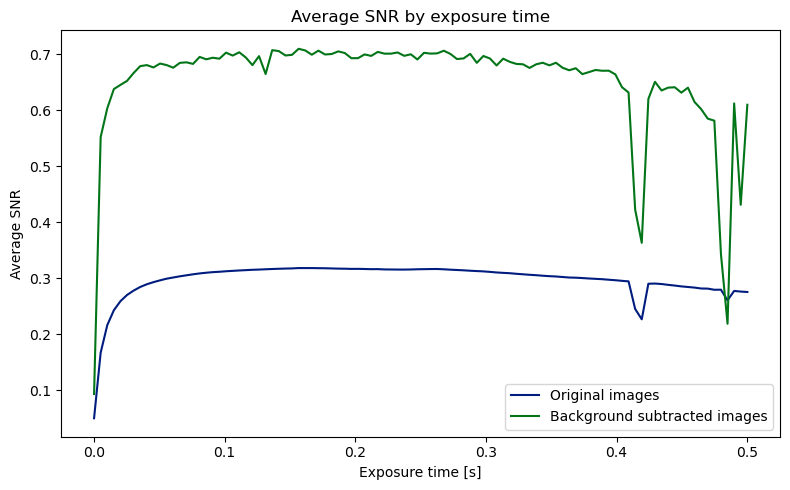

In [24]:
fig,ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(np.asarray(exposure_times)/1e6, snr_average, label='Original images')
ax.plot(np.asarray(exposure_times)/1e6, bgs_snr_average, label='Background subtracted images')
ax.set_ylabel("Average SNR")
ax.set_xlabel("Exposure time [s]")
ax.set_title("Average SNR by exposure time")
ax.legend()
plt.tight_layout()
fig.savefig(os.path.join(path_results, 'SNR.pdf'))

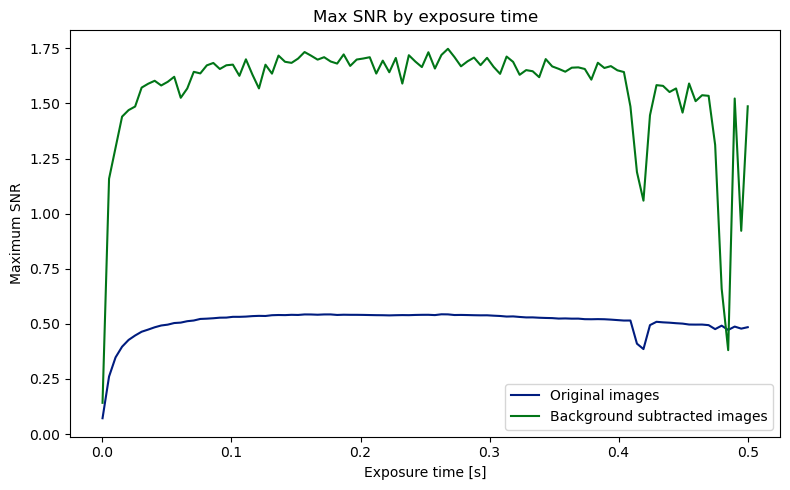

In [25]:
fig,ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(np.asarray(exposure_times)/1e6, snr_max, label='Original images')
ax.plot(np.asarray(exposure_times)/1e6, bgs_snr_max, label='Background subtracted images')
ax.set_ylabel("Maximum SNR")
ax.set_xlabel("Exposure time [s]")
ax.set_title("Max SNR by exposure time")
ax.legend()
plt.tight_layout()
fig.savefig(os.path.join(path_results, 'SNR_max.pdf'))

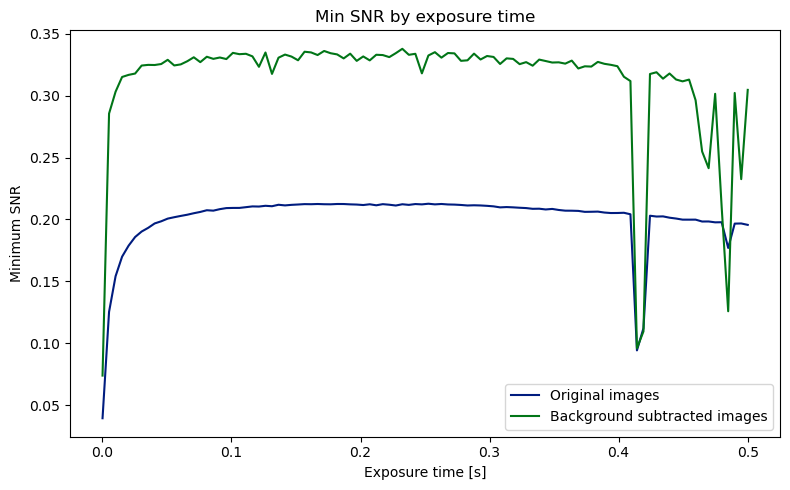

In [26]:
fig,ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(np.asarray(exposure_times)/1e6, snr_min, label='Original images')
ax.plot(np.asarray(exposure_times)/1e6, bgs_snr_min, label='Background subtracted images')
ax.set_ylabel("Minimum SNR")
ax.set_xlabel("Exposure time [s]")
ax.set_title("Min SNR by exposure time")
ax.legend()
plt.tight_layout()
fig.savefig(os.path.join(path_results, 'SNR_min.pdf'))

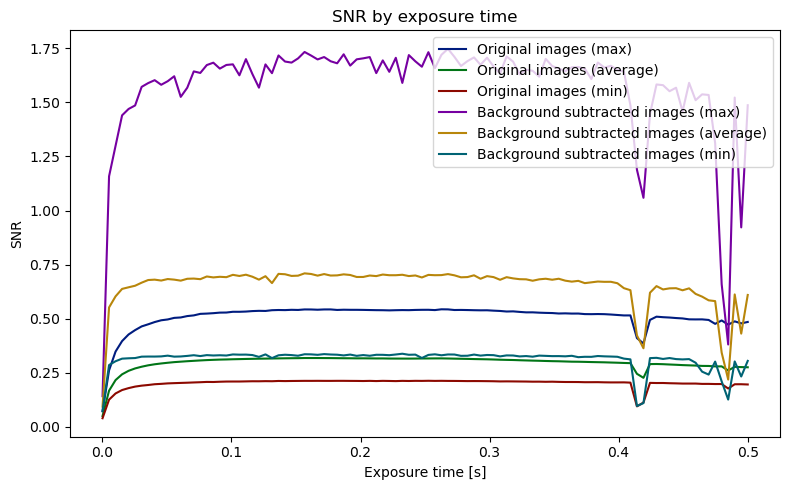

In [27]:
fig,ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(np.asarray(exposure_times)/1e6, snr_max, label='Original images (max)')
ax.plot(np.asarray(exposure_times)/1e6, snr_average, label='Original images (average)')
ax.plot(np.asarray(exposure_times)/1e6, snr_min, label='Original images (min)')
ax.plot(np.asarray(exposure_times)/1e6, bgs_snr_max, label='Background subtracted images (max)')
ax.plot(np.asarray(exposure_times)/1e6, bgs_snr_average, label='Background subtracted images (average)')
ax.plot(np.asarray(exposure_times)/1e6, bgs_snr_min, label='Background subtracted images (min)')
ax.set_ylabel("SNR")
ax.set_xlabel("Exposure time [s]")
ax.set_title("SNR by exposure time")
ax.legend()
plt.tight_layout()
fig.savefig(os.path.join(path_results, 'SNR_combined.pdf'))

In [ ]:
exposure_times